NLTK Preprocessing steps: Compare Text Analytics, NLP and Text Mining Text Analysis Operations using NLTK Tokenization Stopwords Lexicon Normalization such as Stemming and Lemmatization POS Tagging

In [1]:
#Import nltk and 'punkt' to used the .tokenized() method
import nltk
import os
# nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import FreqDist
# nltk.download('averaged_perceptron_tagger')

In [2]:
filepath = os.path.join('RT_CLEAN_DATA.csv')
df = pd.read_csv(filepath, encoding = "ISO-8859-1")
# df.head()

In [3]:
# list(df)

In [4]:
# df.dtypes

In [5]:
# df.shape[0]

In [6]:
df=df[df['Question Number']==20]

In [7]:
#For rows in column 'Response Text Long' set to lowercase
response_lower_case=[]

for idx, row in df.iterrows(): 
    lower=(str(row['Response Text Long'])).lower()
    response_lower_case.append(lower)

In [8]:
df['response_lower_case']=response_lower_case
# df.head()

In [9]:
#Use tokenizer to divide a text into a list of sentences using an unsupervised algorithm 
#RegexpTokenizer splits a string into substrings using a regular expression - used this method because it removes punctuations
from nltk.tokenize import RegexpTokenizer

tokens_list=[]

tokenizer = RegexpTokenizer(r'\w+')
for idx, row in df.iterrows(): 
#     if row['What_can_SAI_make_easier_for_you__c']: 
    tokens=tokenizer.tokenize(str(row['response_lower_case']))
    tokens_list.append(tokens)

In [10]:
# #View tokens_list
# tokens_list

In [11]:
# len(tokens_list)

In [12]:
#Add tokenized list of words to df
df['tokenized_words']=tokens_list
# df=df.drop(columns=['tokenized_words_lower'])

df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words
5928,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"material is the same, activities must be facil...",True,4.63,4.55,35,33,20,Clean,"material is the same, activities must be facil...","[material, is, the, same, activities, must, be..."
5929,12r3c0S4l4w,591,11/13/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"Content is the same, but the tools and modes o...",True,4.71,4.71,1,17,20,Clean,"content is the same, but the tools and modes o...","[content, is, the, same, but, the, tools, and,..."
5930,1l2ks1ndr10Mrt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"the same: the group interaction, group dynamic...",True,4.87,4.87,2,23,20,Clean,"the same: the group interaction, group dynamic...","[the, same, the, group, interaction, group, dy..."
5931,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,2,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,Different: Sometimes its hard to judge how wel...,True,4.83,4.61,4,43,20,Clean,different: sometimes its hard to judge how wel...,"[different, sometimes, its, hard, to, judge, h..."
5932,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,The training material,True,4.50,4.35,4,62,20,Clean,the training material,"[the, training, material]"


In [13]:
# Determine length of 'tokenized words'
df['tokenized_word_count']=df['tokenized_words'].str.len()

df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words,tokenized_word_count
5928,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"material is the same, activities must be facil...",True,4.63,4.55,35,33,20,Clean,"material is the same, activities must be facil...","[material, is, the, same, activities, must, be...",19
5929,12r3c0S4l4w,591,11/13/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"Content is the same, but the tools and modes o...",True,4.71,4.71,1,17,20,Clean,"content is the same, but the tools and modes o...","[content, is, the, same, but, the, tools, and,...",13
5930,1l2ks1ndr10Mrt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"the same: the group interaction, group dynamic...",True,4.87,4.87,2,23,20,Clean,"the same: the group interaction, group dynamic...","[the, same, the, group, interaction, group, dy...",17
5931,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,2,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,Different: Sometimes its hard to judge how wel...,True,4.83,4.61,4,43,20,Clean,different: sometimes its hard to judge how wel...,"[different, sometimes, its, hard, to, judge, h...",41
5932,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,The training material,True,4.50,4.35,4,62,20,Clean,the training material,"[the, training, material]",3


In [14]:
#Apply stop words
from nltk.corpus import stopwords
# nltk.download('stopwords')
# Using stopwords from English Languages
stop_words = set(stopwords.words('english'))

In [15]:
# Itterate through df 'tokenized_words' for stop words
filtered_words_all=[]
for index, row in df.iterrows():
    filtered_words=[]
    tokenized_words=row['tokenized_words']
    for word in tokenized_words:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_words_all.append(filtered_words)
print(filtered_words_all)   

[['material', 'activities', 'must', 'facilitated', 'differently', 'face', 'face', 'vs', 'virtual', 'engagement', 'difficult', 'virtually'], ['content', 'tools', 'modes', 'interaction', 'different'], ['group', 'interaction', 'group', 'dynamics', 'group', 'exercises', 'different', 'setting', 'reliance', 'collaboration', 'tools'], ['different', 'sometimes', 'hard', 'judge', 'well', 'students', 'receiving', 'information', 'since', 'room', 'read', 'body', 'language', 'facial', 'cues', 'material', 'change', 'content'], ['training', 'material'], ['every', 'thing', 'different', 'person', 'training'], ['remote', 'trainers', 'participants', 'different', 'physical', 'locations', 'present', 'virtual', 'class', 'room', 'person', 'trainers', 'participants', 'physical', 'locations', 'room', 'training'], ['face', 'face', 'interaction', 'limited', 'remote'], ['many', 'distractions', 'remote', 'training', 'environment', 'people', 'learn', 'visual', 'auditory', 'queues', 'different', 'distanced', 'enviro

In [16]:
df['filtered_words']=filtered_words_all

In [17]:
# Word count of tokenized reponse
df['filtered_word_count']=df['filtered_words'].str.len()

df.head()

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words,tokenized_word_count,filtered_words,filtered_word_count
5928,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"material is the same, activities must be facil...",True,...,4.55,35,33,20,Clean,"material is the same, activities must be facil...","[material, is, the, same, activities, must, be...",19,"[material, activities, must, facilitated, diff...",12
5929,12r3c0S4l4w,591,11/13/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"Content is the same, but the tools and modes o...",True,...,4.71,1,17,20,Clean,"content is the same, but the tools and modes o...","[content, is, the, same, but, the, tools, and,...",13,"[content, tools, modes, interaction, different]",5
5930,1l2ks1ndr10Mrt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,"the same: the group interaction, group dynamic...",True,...,4.87,2,23,20,Clean,"the same: the group interaction, group dynamic...","[the, same, the, group, interaction, group, dy...",17,"[group, interaction, group, dynamics, group, e...",11
5931,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,2,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,Different: Sometimes its hard to judge how wel...,True,...,4.61,4,43,20,Clean,different: sometimes its hard to judge how wel...,"[different, sometimes, its, hard, to, judge, h...",41,"[different, sometimes, hard, judge, well, stud...",18
5932,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 1 - Welcome to SAFe Remote Trainer,20,What is different and/or the same between remo...,The training material,True,...,4.35,4,62,20,Clean,the training material,"[the, training, material]",3,"[training, material]",2


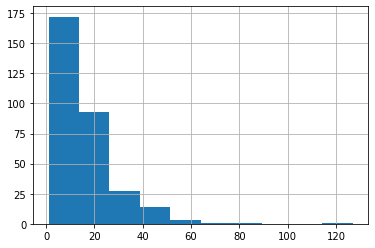

In [18]:
# df['filtered_word_count'].hist()

Normalizing the Data - Stemming VS Lemmatization & POS_tag 
<br>
Stemming is used to nomralize parts of text data - i.e. will shorten all conjugated verbs to the shortest length of characters possible.
<br>
Lemmatization is used in NLP and will enable for words that do not have the same root to be grouped together in order for them to be processed as one item.

In [19]:
# #WordNetLemmtaizer is not iterable, thereofre we couldn't lemmatize individually
# lemmatizer = WordNetLemmatizer()

# #Lemmatize tokens1_stop
# lemmatized_output = [lemmatizer.lemmatize(w) for w in toke_allWords]
# print(lemmatized_output)

In [20]:
# #POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
# tagged_words = []

# for word in df.loc[0, 'filtered_words']:
#     if word not in pos_tag:
#         filtered_word.append(word)

In [21]:
# tagged_words = pos_tag(df.loc[0, 'filtered_words'])
# print(tagged_words)

In [22]:
# tagged_words = pos_tag(lemmatized_output)
# print(tagged_words)

In [23]:
# #Create a dictionary of word frequency with Frequency Distribution?
# #Determine the frequency occurence of each word is column

# #Most common words in responses
# total_freq_dist_pos = FreqDist(tagged_words)
# print(total_freq_dist_pos.most_common(20))

Preparing Data Model/Machine Learning

In [24]:
# TfidfVectorizer from sklearn wants sentences, not list of tokens

df['reconstructed']=df['filtered_words'].apply(lambda x: ' '.join(x))

In [25]:
#Calculate tf-idf scores using sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['reconstructed'])

In [26]:
type(x)

scipy.sparse.csr.csr_matrix

In [27]:
tfidf.vocabulary_

{'material': 691,
 'activities': 16,
 'must': 745,
 'facilitated': 439,
 'differently': 303,
 'face': 435,
 'vs': 1222,
 'virtual': 1212,
 'engagement': 379,
 'difficult': 306,
 'virtually': 1213,
 'content': 235,
 'tools': 1147,
 'modes': 725,
 'interaction': 587,
 'different': 302,
 'group': 505,
 'dynamics': 342,
 'exercises': 414,
 'setting': 995,
 'reliance': 934,
 'collaboration': 194,
 'sometimes': 1034,
 'hard': 519,
 'judge': 610,
 'well': 1233,
 'students': 1064,
 'receiving': 922,
 'information': 566,
 'since': 1015,
 'room': 963,
 'read': 913,
 'body': 115,
 'language': 628,
 'facial': 437,
 'cues': 267,
 'change': 163,
 'training': 1161,
 'every': 398,
 'thing': 1122,
 'person': 832,
 'remote': 941,
 'trainers': 1160,
 'participants': 817,
 'physical': 840,
 'locations': 665,
 'present': 874,
 'class': 180,
 'limited': 656,
 'many': 686,
 'distractions': 327,
 'environment': 388,
 'people': 829,
 'learn': 631,
 'visual': 1215,
 'auditory': 89,
 'queues': 903,
 'distanced':

In [28]:
x.toarray() #this is what we'll training model will

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
#Check the result of maxtrix rom calculation
df_TF_IDF = pd.DataFrame(x.toarray(), 
columns=tfidf.get_feature_names())
print(df_TF_IDF)

      3d  abilities  ability  able  accelerate  access  accessible  according  \
0    0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
1    0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
2    0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
3    0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
4    0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
..   ...        ...      ...   ...         ...     ...         ...        ...   
307  0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
308  0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
309  0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
310  0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   
311  0.0        0.0      0.0   0.0         0.0     0.0         0.0        0.0   

     accountable  accoutrem

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [32]:
df.columns

Index(['Instructor Name (encoded)', 'Instructor ID',
       'Learning Assignment: Completed On',
       'Learning Assignment: Learning Plan: Learning Plan Name',
       'Learning Assignment: Times Launched',
       'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
       'Question Number', 'Question Text', 'Response Text Long',
       'Taught in Last 12 Months',
       'Avg. Score - Knowledge of the course content',
       'Avg. Score - Training and facilitation skills',
       'Number of Classes Taught', 'Number of Attendees', 'COUNT NAME',
       'CLEAN', 'response_lower_case', 'tokenized_words',
       'tokenized_word_count', 'filtered_words', 'filtered_word_count',
       'reconstructed'],
      dtype='object')

In [33]:
# test=df.loc[2540, 'Response Text Long']
# if test==test: 
#     print('not nan')
# else: 
#     print('nan')

In [34]:
# analyzer.polarity_scores(None)

In [35]:
df['Vader']=df['Response Text Long'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if x==x else 0)

In [36]:
X=df[['filtered_word_count', 'Vader']].reset_index(drop=True)
X=pd.concat([X, df_TF_IDF], axis=1)
y=df['Avg. Score - Training and facilitation skills'].reset_index(drop=True)

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y)
lr=LinearRegression()
lr.fit(X_train, y_train)
print(f'Train Score: {lr.score(X_train, y_train)}')
print(f'Test Score: {lr.score(X_test, y_test)}')

Train Score: 0.999989965550892
Test Score: -1.8661377975875302e+18


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'Train Score: {rf.score(X_train, y_train)}')
print(f'Test Score: {rf.score(X_test, y_test)}')

Train Score: 0.8447047193071184
Test Score: -0.027687926069931645


Question 11 - Linear Regression
Train Score:
Test Score: 
<br>